DATA 620 Final Project

Amazon Software Reviews
Benson Toi, Noah Collin, Ahmed Elsaeyed

Data source: https://nijianmo.github.io/amazon/index.html

This is a sentiment analyisis of Amazon reviews of software from 1998-2015


In [1]:
#conda install -c conda-forge spacy

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from spacy.tokens import Token

import nltk
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

!pip install -q tensorflow-text
import tensorflow_text as text
import tensorflow_hub as hub

# Below the code, it's a Universal Sentence Encoder where any text can be converted into tensors easily
USE = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

2022-07-17 22:15:22.275679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print("Pandas version: {}".format(pd.__version__))
#print("datetime version: {}".format(datetime.__version__))
print("Seaborn version: {}".format(sns.__version__))

Pandas version: 1.4.2
Seaborn version: 0.11.2


In [4]:
df = pd.read_json('Software.json',  lines=True) #lines equal true because the CSV has \n chars

In [5]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN


In [6]:
def HumanTime (x):
    return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

HumanTime(df['unixReviewTime'][0])

'2014-03-11 00:00:00'

In [7]:
df['ReviewTime']=df.unixReviewTime.apply(HumanTime)
df['ReviewTime'].head(3)

0    2014-03-11 00:00:00
1    2014-02-23 00:00:00
2    2014-02-17 00:00:00
Name: ReviewTime, dtype: object

In [8]:
df['Year'] = df['ReviewTime'].apply(lambda x: int(re.findall ("\d+", x)[0]))
df['Year'].value_counts()

2015    86324
2014    77348
2016    66786
2013    46663
2017    29350
2012    22894
2009    20000
2008    17735
2011    17061
2010    15185
2007    13962
2018    13123
2006     8486
2005     6724
2004     4685
2003     4681
2002     4144
2001     2833
2000     1326
1999      125
1998        1
Name: Year, dtype: int64

In [9]:
df.reviewText.describe()

count     459370
unique    421432
top         good
freq         811
Name: reviewText, dtype: object

In [10]:
df.summary.describe()

count         459380
unique        286888
top       Five Stars
freq           51188
Name: summary, dtype: object

In [11]:
df.overall.value_counts()

5    212452
1    102548
4     73596
3     39395
2     31445
Name: overall, dtype: int64

In [12]:
df.overall.describe()

count    459436.000000
mean          3.570175
std           1.626662
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

[Text(0.5, 1.0, 'Distribution of reviews for Software'),
 Text(0.5, 0, 'Review Score')]

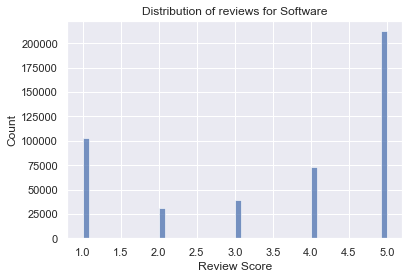

In [13]:
sns.set(style="darkgrid")
sns.histplot(df['overall']).set(title = "Distribution of reviews for Software",
                                        xlabel = 'Review Score')

In [14]:
oneStarReviews = df[df['overall']==1]
oneStarReviews.shape

(102548, 14)

In [15]:
twoStarReviews = df[df['overall']==2]
threeStarReviews = df[df['overall']==3]
fourStarReviews = df[df['overall']==4]
fiveStarReviews = df[df['overall']==5]

## Benson

## create dataframe with min variable. 

In [16]:
df_rating = df[["reviewText","overall"]]
df_rating.head()

,reviewText,overall
0,The materials arrived early and were in excell...,4
1,I am really enjoying this book with the worksh...,4
2,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",1
3,This book was missing pages!!! Important pages...,3
4,I have used LearnSmart and can officially say ...,5


In [17]:
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(df_rating.shape[0]))
    print(f"REVIEW TEXT:\n{df_rating['reviewText'][i]} \n\nRATE:\n{df_rating['overall'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
cool 

RATE:
4

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
thanks 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I purchased this product and installed it on my desktop computer.  Since the CD/DVD drive on my laptop is not working I tried to download the software from the CyberLink website.  Their customer service is the WORST!!!  I have been unable to get an answer to my question, as to is this a "one time use product", or do I OWN it now that I have purchased it?  Since I have the product key, why can't I download it to my laptop?!  You have to PAY them to talk to someone on the phone!!  I have never heard of such a thing!!  I WAS going to purchase their photo editing software, but I won't bother now.  Do not waste your money on this product!!  If you want excellent video editing software at a reasonable price, then check out Magix Movie 

## breakdown into 3 catergory

In [18]:
df_rating['Sentiment_Type']=''
df_rating.loc[df.overall>3,'Sentiment_Type']='POSITIVE'
df_rating.loc[df.overall==3,'Sentiment_Type']='NEUTRAL'
df_rating.loc[df.overall<3,'Sentiment_Type']='NEGATIVE'

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_9126/2989913691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['Sentiment_Type']=''


In [19]:
df_rating.head()

,reviewText,overall,Sentiment_Type
0,The materials arrived early and were in excell...,4,POSITIVE
1,I am really enjoying this book with the worksh...,4,POSITIVE
2,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",1,NEGATIVE
3,This book was missing pages!!! Important pages...,3,NEUTRAL
4,I have used LearnSmart and can officially say ...,5,POSITIVE


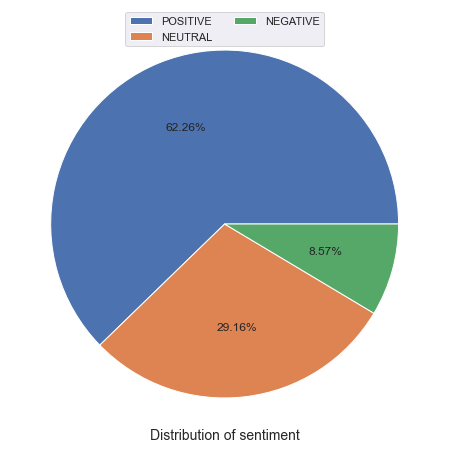

In [20]:
plt.figure(figsize = (8, 8))

labels = ['POSITIVE','NEUTRAL', 'NEGATIVE']
plt.pie(df_rating['Sentiment_Type'].value_counts(), autopct='%0.2f%%')

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

## Remove null? to fix the float text for doing join()

In [21]:
df_rating.dropna(inplace=True)
df_rating.isnull().sum()

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_9126/2236577293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating.dropna(inplace=True)


reviewText        0
overall           0
Sentiment_Type    0
dtype: int64

## create function to clean text

ref: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


In [22]:
def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>()').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [23]:
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)    
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    # Stop word lists can be adjusted for your problem
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and", "i", "be", "have", "of", "you", "for", "my", "in", "with", "use" ]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [24]:
# This is a helper function to map NTLK position tags

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)    
    output: lemmatized text (str)
    """
    text = str(text)
    
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

## Clean the review text

In [ ]:

df_rating['text'] = df_rating['reviewText'].apply(clean_text)

df_rating['text'] = df_rating['text'].apply(remove_stopwords)

df_rating['text'] = df_rating['text'].apply(lemmatize)

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_9126/2990074714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['text'] = df_rating['reviewText'].apply(clean_text)
/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_9126/2990074714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['text'] = df_rating['text'].apply(remove_stopwords)


In [ ]:
all_words = pd.Series(' '.join(df_rating['text']).split())

In [ ]:

all_words.value_counts()

## Spacy module!

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
positiveWords = pd.Series(' '.join(df_rating[df_rating['Sentiment_Type']=='POSITIVE']['text']).split())

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used positive Words in all reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
negativeWords = pd.Series(' '.join(df_rating[df_rating['Sentiment_Type']=='NEGATIVE']['text']).split())

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used negative Words in all reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
neutralWords = pd.Series(' '.join(df_rating[df_rating['Sentiment_Type']=='NEUTRAL']['text']).split())

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(neutralWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used neutral Words in all reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
sr_all_words = pd.Series(all_words)
  

In [ ]:
sr_all_words.value_counts().head(10)

In [ ]:
sr_positive = pd.Series(positiveWords)

In [ ]:
sr_positive.value_counts().head(10)

In [ ]:
sr_negative = pd.Series(negativeWords)

In [ ]:
sr_negative.value_counts().head(10)

In [ ]:
sr_neutral = pd.Series(neutralWords)

In [ ]:
sr_neutral.value_counts().head(10)

## cont....

In [ ]:
df_rating

In [ ]:
df_rating_review = df_rating[["text","Sentiment_Type"]]
df_rating_review.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  df_rating_review.Sentiment_Type.to_numpy().reshape(-1, 1)
)

In [ ]:
from sklearn.model_selection import train_test_split

train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    df_rating_review.text, 
    type_one_hot, 
    test_size=.1, 
    random_state=42
  )

In [ ]:
from tqdm import tqdm

X_train = []
for r in tqdm(train_reviews):
  emb = USE(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_reviews):
  emb = USE(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)